In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
exp4_1_df = pd.read_csv('./csv/exp4_1.csv', sep=',')

In [34]:
exp4_2_df = pd.read_csv('./csv/exp4_2.csv', sep=',')

In [35]:
exp4_3_df = pd.read_csv('./csv/exp4_3.csv', sep=',')

In [36]:
exp4_4_df = pd.read_csv('./csv/exp4_4.csv', sep=',')

In [37]:
exp4_5_df = pd.read_csv('./csv/exp4_5.csv', sep=',')

In [38]:
exp4_6_df = pd.read_csv('./csv/exp4_6.csv', sep=',')

In [39]:
exp4_7_df = pd.read_csv('./csv/exp4_7.csv', sep=',')

In [40]:
exp4_8_df = pd.read_csv('./csv/exp4_8.csv', sep=',')

In [41]:
exp4_1_df

,Timestamp,Relative_Time,frequency,flow_rate,Valve_KNOPKA_state
0,2025-01-12 20:35:31.129,245.758,32.68594,0.013333,1
1,2025-01-12 20:35:31.453,246.081,26.70441,0.013333,1
2,2025-01-12 20:35:31.777,246.406,28.23670,0.013333,1
3,2025-01-12 20:35:32.212,246.841,30.11440,0.013333,1
4,2025-01-12 20:35:32.537,247.166,28.91126,0.013333,1
...,...,...,...,...,...
491,2025-01-12 20:36:52.977,327.606,73.14272,0.142222,1
492,2025-01-12 20:36:52.985,327.613,73.14272,0.142222,1
493,2025-01-12 20:36:53.196,327.824,63.40591,0.142222,1
494,2025-01-12 20:36:53.303,327.932,63.40591,0.144445,1


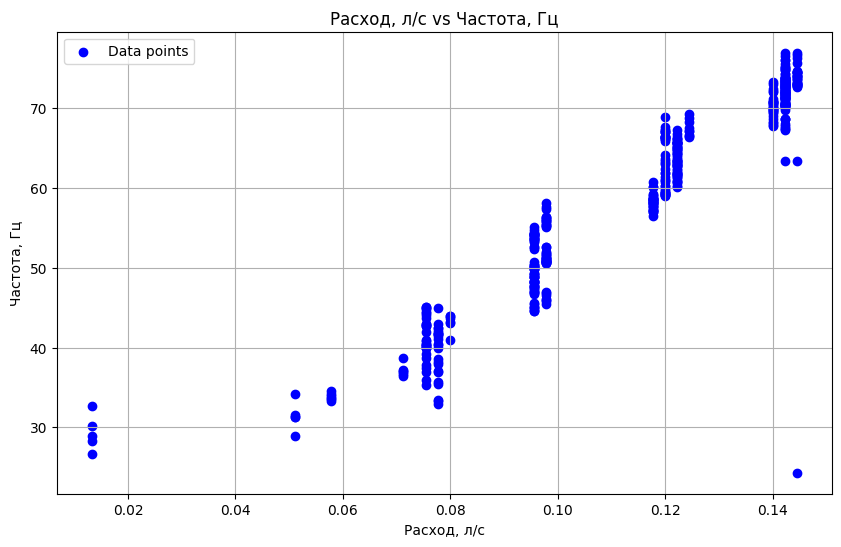

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(exp4_1_df['flow_rate'], exp4_1_df['frequency'], c='blue', label="Data points")
plt.xlabel('Расход, л/с')
plt.ylabel('Частота, Гц')
plt.title('Расход, л/с vs Частота, Гц')
plt.legend()
plt.grid()
plt.show()

Вычисление изменений состояний

In [43]:
dataframes = [exp4_1_df, exp4_2_df, exp4_3_df, exp4_4_df, exp4_5_df, exp4_6_df, exp4_7_df, exp4_8_df]

In [44]:
for df in dataframes:
    df['change_detected'] = df['Valve_KNOPKA_state'].diff().fillna(0) != 0

Накопительный счет изменений состояний

In [45]:
for df in dataframes:
    df['cumulative_changes'] = df['change_detected'].cumsum()

Убираем первые 7 переключений кнопки

In [63]:
for idx in range(len(dataframes)):
    dataframes[idx] = dataframes[idx].loc[dataframes[idx]['cumulative_changes'] > 6]

Присваиваем отфильтрованные DataFrames обратно их исходным переменным

In [64]:
exp4_1_df, exp4_2_df, exp4_3_df, exp4_4_df, exp4_5_df, exp4_6_df, exp4_7_df, exp4_8_df = dataframes

Определяем количество воды в баке после 7 переключений

In [65]:
for df in dataframes:
    df.loc[:, 'cumulative_flow_tanck'] = df['cumulative_changes']/2 - 3.5

Вычисляем мгновенный расход

In [66]:
for df in dataframes:
    df.loc[:, 'instant_flow'] = df['Relative_Time'].diff()*df['flow_rate']

Определяем накопленный расход по расходомеру

In [67]:
for df in dataframes:
    df.loc[:, 'cumulative_flow'] = df['instant_flow'].cumsum()

In [75]:
exp4_8_df

,Timestamp,Relative_Time,frequency,flow_rate,Valve_KNOPKA_state,change_detected,cumulative_changes,cumulative_flow_tanck,instant_flow,cumulative_flow
462,2025-01-12 21:05:53.317,214.182,101.64050,0.188889,0,True,7,0.0,NaN,NaN
463,2025-01-12 21:05:53.401,214.265,97.58478,0.188889,0,False,7,0.0,0.015678,0.015678
464,2025-01-12 21:05:53.510,214.374,98.90316,0.188889,0,False,7,0.0,0.020589,0.036267
465,2025-01-12 21:05:53.619,214.483,99.49555,0.188889,0,False,7,0.0,0.020589,0.056856
466,2025-01-12 21:05:53.727,214.591,97.05628,0.188889,0,False,7,0.0,0.020400,0.077256
...,...,...,...,...,...,...,...,...,...,...
733,2025-01-12 21:06:22.604,243.468,66.09604,0.142222,0,False,15,4.0,0.000000,5.518727
734,2025-01-12 21:06:22.714,243.578,66.77930,0.142222,0,False,15,4.0,0.015644,5.534371
735,2025-01-12 21:06:22.817,243.681,66.77930,0.142222,0,False,15,4.0,0.014649,5.549020
736,2025-01-12 21:06:22.931,243.795,65.76654,0.142222,0,False,15,4.0,0.016213,5.565234


In [76]:
grouped_dataframes = []

In [77]:
for df in dataframes:
    grouped = df.groupby('cumulative_changes').agg({'instant_flow': 'sum'})
    grouped_dataframes.append(grouped)

Посмотрим, какой объем насчитал расходомер за все эксперименты после 7 нажатия, пока в баке визуально набиралось 0.5 л

In [106]:
all_instant_flow_values = pd.concat([df['instant_flow'] for df in grouped_dataframes], axis=0)

Построим гистограмму

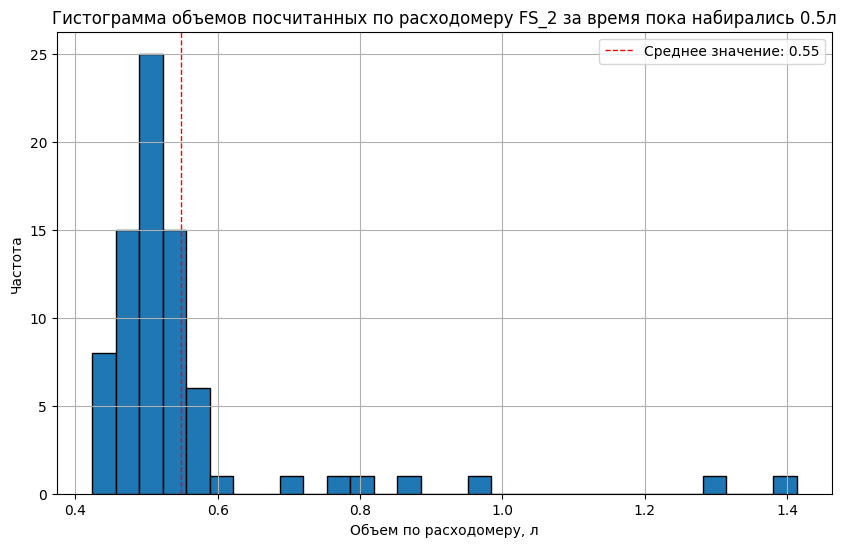

In [167]:
plt.figure(figsize=(10, 6))
plt.hist(all_instant_flow_values, bins=30, edgecolor='k')  

# Вычисление среднего
mean_value = all_instant_flow_values.mean()

# Добавляем вертикальную линию на гистограмму для среднего
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Среднее значение: {mean_value:.2f}')

# Дополнительные украшения
plt.xlabel('Объем по расходомеру, л')
plt.ylabel('Частота')
plt.title('Гистограмма объемов посчитанных по расходомеру FS_2 за время пока набирались 0.5л')
plt.legend()
plt.grid(True)
plt.savefig(f'./results/hist.png')
plt.show()

Из гисограммы видно, что были явно ошибочные данные, которые встречались по одному разу или пропуски нажатия или в конце отсутствовало нажатие на кнопку наполнения 0.5л. Поэтому уберем значения, которые больше 0.6 л.

In [168]:
filtered_instant_flow_values = all_instant_flow_values[all_instant_flow_values <= 0.6]

Построим гистограмму для отфильтрованных значений

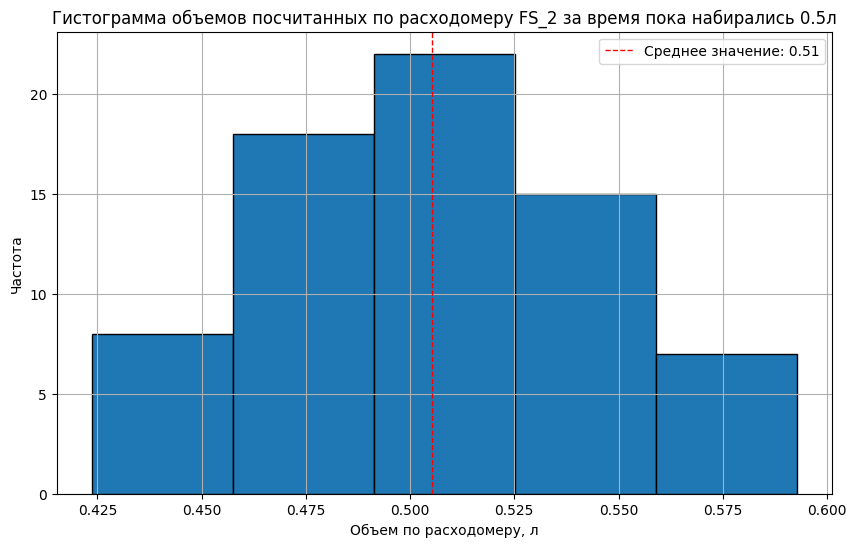

In [169]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_instant_flow_values, bins=5, edgecolor='k')  

# Вычисление среднего
mean_value = filtered_instant_flow_values.mean()

# Добавляем вертикальную линию на гистограмму для среднего
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Среднее значение: {mean_value:.2f}')

# Дополнительные украшения
plt.xlabel('Объем по расходомеру, л')
plt.ylabel('Частота')
plt.title('Гистограмма объемов посчитанных по расходомеру FS_2 за время пока набирались 0.5л')
plt.legend()
plt.grid(True)
plt.savefig(f'./results/hist_filtered.png')
plt.show()

Среднее значение отфильтрованных данных соответствует 0.51. Можно сделать вывод, что в целом расходомер дает значения близкие к реальным. Но определить погрешность измерений при таком методе проблематично из-за погрешности визуального контроля и задержки нажатия на кнопку.

In [170]:
all_experiments = pd.concat([df for df in dataframes], axis=0)

Извлекаем значения колонок

In [171]:
X = all_experiments[['frequency']].values.reshape(-1, 1)
y = all_experiments['flow_rate'].values

Создаем объект линейной регрессии

In [172]:
model = LinearRegression()

In [173]:
model.fit(X, y)

LinearRegression()

In [174]:
y_pred = model.predict(X)

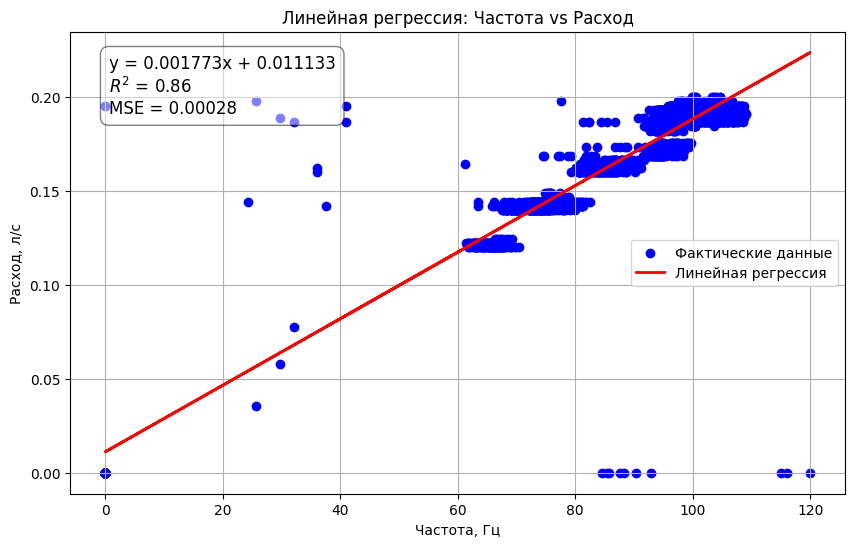

In [175]:
# Вычисляем коэффициенты модели
coef = model.coef_[0]
intercept = model.intercept_

# Вычисляем метрики
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Рисуем график
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Фактические данные')
plt.plot(X, y_pred, color='red', linewidth=2, label='Линейная регрессия')
plt.xlabel('Частота, Гц')
plt.ylabel('Расход, л/с')
plt.title('Линейная регрессия: Частота vs Расход')

# Добавляем уравнение прямой и метрики на график
equation_text = f'y = {coef:.6f}x + {intercept:.6f}\n$R^2$ = {r2:.2f}\nMSE = {mse:.5f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

plt.legend()
plt.grid(True)
plt.savefig(f'./results/lintar_regression.png')
plt.show()

Выводим коэффициенты модели в консоль

In [176]:
print(f"a: {coef}")
print(f"b: {intercept}")
print(f"R²: {r2}")
print(f"MSE: {mse}")

a: 0.001772702742484599
b: 0.011133224447674839
R²: 0.8550372086563749
MSE: 0.00028141295512019353


Отфильтруем выбросы, для частоты и расхода

In [177]:
all_experiments_filtered = all_experiments.loc[all_experiments['frequency'] > 50 ]

In [178]:
all_experiments_filtered = all_experiments_filtered.loc[all_experiments_filtered['flow_rate'] > 0]

Извлекаем значения колонок

In [179]:
X = all_experiments_filtered[['frequency']].values.reshape(-1, 1)
y = all_experiments_filtered['flow_rate'].values

Создаем объект линейной регрессии

In [180]:
model = LinearRegression()

In [181]:
model.fit(X, y)

LinearRegression()

In [182]:
y_pred = model.predict(X)

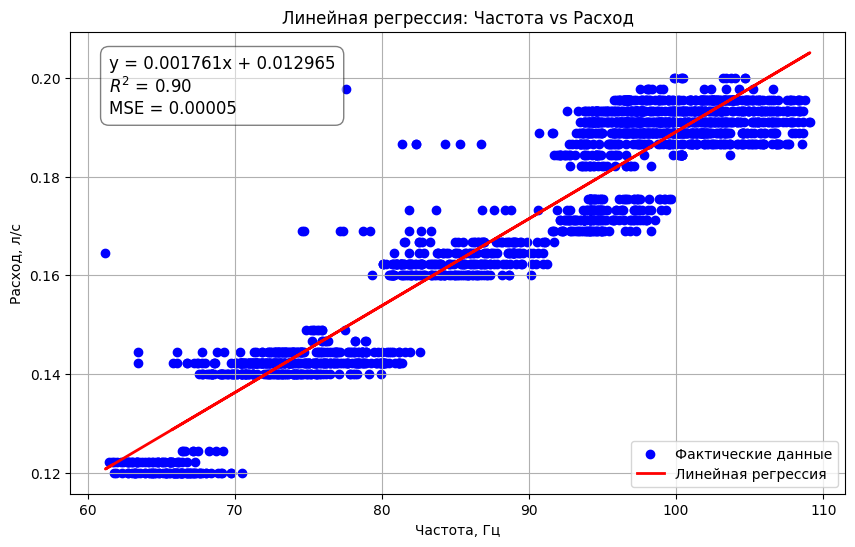

In [183]:
# Вычисляем коэффициенты модели
coef = model.coef_[0]
intercept = model.intercept_

# Вычисляем метрики
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Рисуем график
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Фактические данные')
plt.plot(X, y_pred, color='red', linewidth=2, label='Линейная регрессия')
plt.xlabel('Частота, Гц')
plt.ylabel('Расход, л/с')
plt.title('Линейная регрессия: Частота vs Расход')

# Добавляем уравнение прямой и метрики на график
equation_text = f'y = {coef:.6f}x + {intercept:.6f}\n$R^2$ = {r2:.2f}\nMSE = {mse:.5f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

plt.legend()
plt.grid(True)
plt.savefig(f'./results/lintar_regression_filtered.png')
plt.show()

Выводим коэффициенты модели в консоль

In [184]:
print(f"a: {coef}")
print(f"b: {intercept}")
print(f"R²: {r2}")
print(f"MSE: {mse}")

a: 0.0017612042541726707
b: 0.012964649663163519
R²: 0.9023397035635587
MSE: 5.392863327942901e-05
